# Bibliotheken

In [21]:
### Bibliotheken
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import IMU_funcions


# Datei Struktur

In [22]:
### Daten strukturiert einlesen

# Personalisierte Pfade
folder_pictures = "Plot_Bilder_IMU/D/"

# Manuelle Datei-Zuordnung (Dateiname → Key)
C_Daten_file_map = {
    "Li_1_Pre": "D_Daten/Pre_D_Li_1.csv",
    "Li_2_Pre": "D_Daten/Pre_D_Li_2.csv",
    "Li_3_Pre": "D_Daten/Pre_D_Li_3.csv",
    "Re_1_Pre": "D_Daten/Pre_D_Re_1.csv",
    "Re_2_Pre": "D_Daten/Pre_D_Re_2.csv",
    "Re_3_Pre": "D_Daten/Pre_D_Re_3.csv",
    "Li_1_Post": "D_Daten/Post_D_Li_1.csv",
    "Li_2_Post": "D_Daten/Post_D_Li_2.csv",
    "Li_3_Post": "D_Daten/Post_D_Li_3.csv",
    "Re_1_Post": "D_Daten/Post_D_Re_1.csv",
    "Re_2_Post": "D_Daten/Post_D_Re_2.csv",
    "Re_3_Post": "D_Daten/Post_D_Re_3.csv",
}

landing_peaks = IMU_funcions.load_landing_peaks_for_subject("landing_peaks.csv", "D")
print (landing_peaks)

# Relevante Spalten
columns_to_extract = [
    # Zeit
    "time",

    # Linkes Bein
    "LT Hip Flexion (deg)", 
    "LT Hip Abduction (deg)", 
    "LT Hip Rotation Ext (deg)",
    "LT Knee Abduction (deg)", 
    "LT Knee Rotation Ext (deg)", 
    "LT Knee Flexion (deg)",
    "LT Ankle Dorsiflexion (deg)",
    "LT Ankle Abduction (deg)",
    "LT Ankle Inversion (deg)",

    # Rechtes Bein
    "RT Hip Flexion (deg)", 
    "RT Hip Abduction (deg)", 
    "RT Hip Rotation Ext (deg)",
    "RT Knee Abduction (deg)", 
    "RT Knee Rotation Ext (deg)", 
    "RT Knee Flexion (deg)",
    "RT Ankle Dorsiflexion (deg)",
    "RT Ankle Abduction (deg)",
    "RT Ankle Inversion (deg)",

    # Torso-Pelvis
    "Torso-Pelvic Flexion Fwd (deg)", "LT Torso-Pelvic Flexion Lat (deg)", "RT Torso-Pelvic Flexion Lat (deg)",

    # Upper spine
    # "Noraxon MyoMotion-Segments-Upper spine-Tilt Fwd (deg)",
    # "Noraxon MyoMotion-Segments-Upper spine-Roll (deg)"            # --> gibts nicht in allen CSVs 
    # "Noraxon MyoMotion-Segments-Upper spine-LT Tilt Lat (deg)",
    # "Noraxon MyoMotion-Segments-Upper spine-RT Tilt Lat (deg)",
    # "Noraxon MyoMotion-Segments-Upper spine-LT Rotation (deg)",
    # "Noraxon MyoMotion-Segments-Upper spine-RT Rotation (deg)"
]

### haupt Datenstruktur initialisieren 
data = IMU_funcions.Data_structure(C_Daten_file_map, landing_peaks, columns_to_extract)


{'Li_1_Pre': 2.515, 'Li_2_Pre': 2.753, 'Li_3_Pre': 2.508, 'Re_1_Pre': 2.318, 'Re_2_Pre': 2.24, 'Re_3_Pre': 2.985, 'Li_1_Post': 3.344, 'Li_2_Post': 3.049, 'Li_3_Post': 3.981, 'Re_1_Post': 3.666, 'Re_2_Post': 5.204, 'Re_3_Post': 3.922}


c:\Users\tills\Desktop\Studium\Semester_4\Repositories\BewA_Stability\IMU_funcions.py:41: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath, delimiter=';', encoding='utf-8', decimal=',', skiprows=3)
c:\Users\tills\Desktop\Studium\Semester_4\Repositories\BewA_Stability\IMU_funcions.py:41: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath, delimiter=';', encoding='utf-8', decimal=',', skiprows=3)
c:\Users\tills\Desktop\Studium\Semester_4\Repositories\BewA_Stability\IMU_funcions.py:41: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath, delimiter=';', encoding='utf-8', decimal=',', skiprows=3)
c:\Users\tills\Desktop\Studium\Semester_4\Repositories\BewA_Stability\IMU_funcions.py:41: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or s

## Plot Parameter

In [37]:
# Keys für die festlegen
keys = ("Li_1_Pre", "Li_2_Pre", "Li_3_Pre","Re_1_Pre","Re_2_Pre","Re_3_Pre", "Li_1_Post", "Li_2_Post", "Li_3_Post","Re_1_Post","Re_2_Post","Re_3_Post")

### Hier eingeben, welche Seite und Phase geplottet werden sollen
keys_plotting, direktion = IMU_funcions.get_keys_and_direction("RT", "Pre")

### Farben für die Plots definieren
colors, color_peak, color_stable = IMU_funcions.get_colors()

# Erste Stabilisationsphase 
(Knie, Hüft, Sprunggelenkswinkel verändern sich nicht mehr viel nach landung)

In [38]:
### Bestimmungs parameter
RT_joints = ("RT Knee Flexion (deg)", "RT Hip Flexion (deg)", "RT Ankle Dorsiflexion (deg)")
LT_joints = ("LT Knee Flexion (deg)", "LT Hip Flexion (deg)", "LT Ankle Dorsiflexion (deg)")

# Schwellenwerte durch probieren
pre_treshholds = (11, 15.5 , 15.5)        # (Knie, Hüfte, Sprunggelenk)
post_treshholds = (14, 18, 11)   # (Knie, Hüfte, Sprunggelenk)
mean_stable_times = {}

for key in keys:
    stable_times = []

    # Entscheide, ob linke oder rechte Gelenke verwendet werden sollen und Pre oder Post
    if key.startswith("R"): # R für Rechtes Bein
        joints = RT_joints

        if key[6] == "r":               # r für Pre
            min_consecutive = 400
            treshholds = pre_treshholds
        elif key[6] == "o":             # o für Post
            min_consecutive = 525
            treshholds = post_treshholds

    elif key.startswith("L"): # L für Linkes Bein
        joints = LT_joints

        if key[6] == "r":               # r für Pre
            min_consecutive = 600
            treshholds = pre_treshholds
        elif key[6] == "o":             # o für Post  
            min_consecutive = 400
            treshholds = post_treshholds


    for joint, slope_threshold in zip(joints, treshholds):
        flexion = data[key]["df"][joint]
        time = data[key]["df"]["time"]
        peak_time = data[key]["landing_peak_time"]

        stable_time = IMU_funcions.find_stable_time(time, flexion, peak_time, slope_threshold, min_consecutive)
        stable_times.append(stable_time)

        print(f"Stabiler Zeitpunkt für {key} ({joint}): {stable_time:.3f} s")

    # Mittelwert der drei Zeitpunkte (sofern keine NaNs enthalten)
    stable_times = [t for t in stable_times if not np.isnan(t)]
    if stable_times:
        mean_time = np.mean(stable_times)
    else:
        mean_time = np.nan

    mean_stable_times[key] = mean_time
    print(f"🟢 Mittlerer stabiler Zeitpunkt für {key}: {mean_time:.3f} s\n")


### in Datenstruktur speichern
for key in mean_stable_times:
    data[key]["stable_time"] = mean_stable_times[key]


Stabiler Zeitpunkt für Li_1_Pre (LT Knee Flexion (deg)): 3.985 s
Stabiler Zeitpunkt für Li_1_Pre (LT Hip Flexion (deg)): 3.710 s
Stabiler Zeitpunkt für Li_1_Pre (LT Ankle Dorsiflexion (deg)): 3.945 s
🟢 Mittlerer stabiler Zeitpunkt für Li_1_Pre: 3.880 s

Stabiler Zeitpunkt für Li_2_Pre (LT Knee Flexion (deg)): 3.950 s
Stabiler Zeitpunkt für Li_2_Pre (LT Hip Flexion (deg)): 3.916 s
Stabiler Zeitpunkt für Li_2_Pre (LT Ankle Dorsiflexion (deg)): 3.691 s
🟢 Mittlerer stabiler Zeitpunkt für Li_2_Pre: 3.852 s

Stabiler Zeitpunkt für Li_3_Pre (LT Knee Flexion (deg)): 3.610 s
Stabiler Zeitpunkt für Li_3_Pre (LT Hip Flexion (deg)): 3.610 s
Stabiler Zeitpunkt für Li_3_Pre (LT Ankle Dorsiflexion (deg)): 3.424 s
🟢 Mittlerer stabiler Zeitpunkt für Li_3_Pre: 3.548 s

Stabiler Zeitpunkt für Re_1_Pre (RT Knee Flexion (deg)): 2.939 s
Stabiler Zeitpunkt für Re_1_Pre (RT Hip Flexion (deg)): 4.005 s
Stabiler Zeitpunkt für Re_1_Pre (RT Ankle Dorsiflexion (deg)): 2.859 s
🟢 Mittlerer stabiler Zeitpunkt für Re_

In [49]:
### Probieren ###

# key11 = "Re_1_Post"  # Beispiel

# knee_flexion, time, peak_time = data[key11]["df"]["LT Knee Flexion (deg)"], data[key11]["df"]["time"], data[key11]["landing_peak_time"]
# hip_flexion, time, peak_time = data[key11]["df"]["LT Hip Flexion (deg)"], data[key11]["df"]["time"], data[key11]["landing_peak_time"]
# ankle_flexion, time, peak_time = data[key11]["df"]["LT Ankle Dorsiflexion (deg)"], data[key11]["df"]["time"], data[key11]["landing_peak_time"]

# plot_var = hip_flexion

# stable_time = IMU_funcions.find_stable_time(time, plot_var, peak_time, slope_threshold=18, min_consecutive=525)
# print(f"Stabiler Zeitpunkt für {key11}: {stable_time:.3f} s")

# # Plotten
# plt.figure(figsize=(10,5))
# plt.plot(time, plot_var, label="Flexion")
# plt.axvline(x=peak_time, color='red', linestyle='--', label="Landing Peak")
# if not np.isnan(stable_time):
#     plt.axvline(x=stable_time, color='green', linestyle='--', label="Stabiler Zeitpunkt")
# plt.xlabel("Zeit (s)")
# plt.ylabel("Flexion (°)")
# plt.title(f"Flexion und stabiler Zeitpunkt für {key11}")
# plt.legend()
# plt.grid(True)
# plt.show()



# Stabilisierungszeit auswerten

In [40]:
### Printen der Zeitdifferenzen zwischen Landing Peak und stabilem Zeitpunkt und speichern in der Datenstruktur

last_phase = None  # Merken, ob vorher "Pre" oder "Post" war
for key in keys:
    # Teile Key auf → z. B. "Re_1_Pre" → ["Re", "1", "Pre"]
    parts = key.split("_")
    phase = parts[2]  # "Pre" oder "Post"

    # Trennlinie bei Wechsel von Pre → Post
    if last_phase is not None and phase != last_phase:
        print("-------------------------------------")

    # Berechne Zeitdifferenz zwischen Landing Peak und stabilem Zeitpunkt
    peak_time = data[key]["landing_peak_time"]
    stable_time = data[key]["stable_time"]
    time_difference = stable_time - peak_time

    # Speichere Zeitdifferenz in der Datenstruktur
    data[key]["time_difference"] = time_difference
    print(f"Zeitdifferenz für {key}: {time_difference:.3f} s")

    last_phase = phase



Zeitdifferenz für Li_1_Pre: 1.365 s
Zeitdifferenz für Li_2_Pre: 1.099 s
Zeitdifferenz für Li_3_Pre: 1.040 s
Zeitdifferenz für Re_1_Pre: 0.950 s
Zeitdifferenz für Re_2_Pre: 1.778 s
Zeitdifferenz für Re_3_Pre: 1.079 s
-------------------------------------
Zeitdifferenz für Li_1_Post: 0.806 s
Zeitdifferenz für Li_2_Post: 0.967 s
Zeitdifferenz für Li_3_Post: 1.449 s
Zeitdifferenz für Re_1_Post: 1.520 s
Zeitdifferenz für Re_2_Post: 1.627 s
Zeitdifferenz für Re_3_Post: 1.363 s


## Vergleich

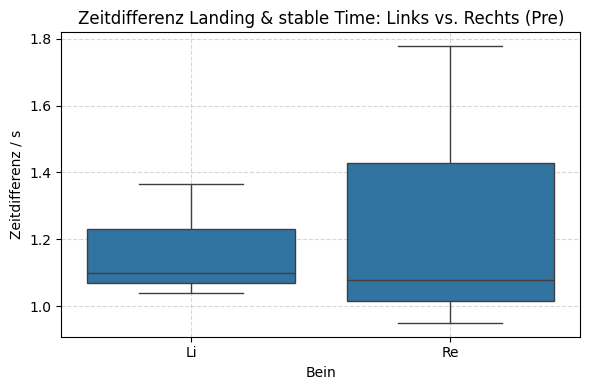

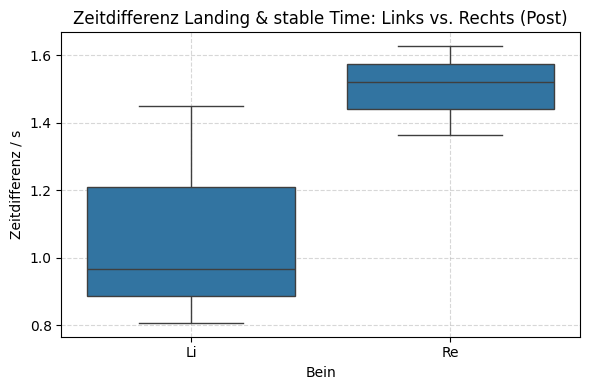

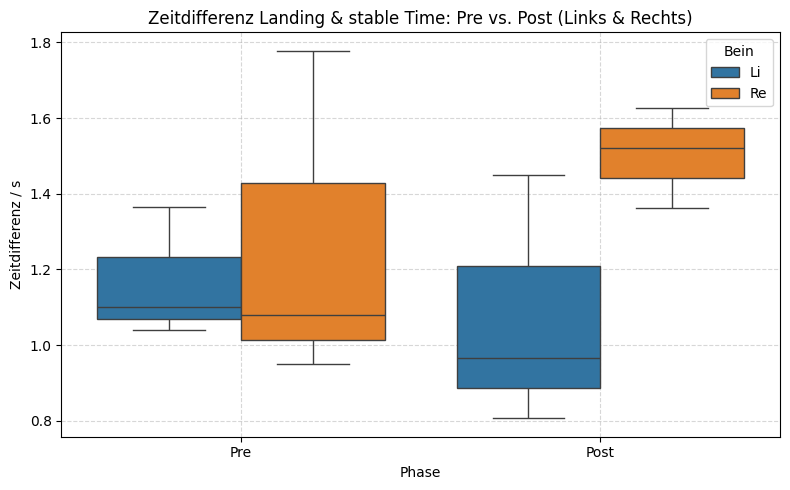

In [41]:
### Plotten der Zeitdifferenzen Rechts und Links und Pre und Post
IMU_funcions.plot_boxplot (
    DATA=data,
    title="Zeitdifferenz Landing & stable Time: ",
    y_label="Zeitdifferenz / s",
    data_key="time_difference",
    folder_pictures_ = folder_pictures
)


# Knie/ Hüfte Auswertung

In [42]:
# print (data["Re_1_Pre"]["stable_time"])
# print (data["Re_1_Pre"]["df"]["LT Hip Flexion (deg)"])

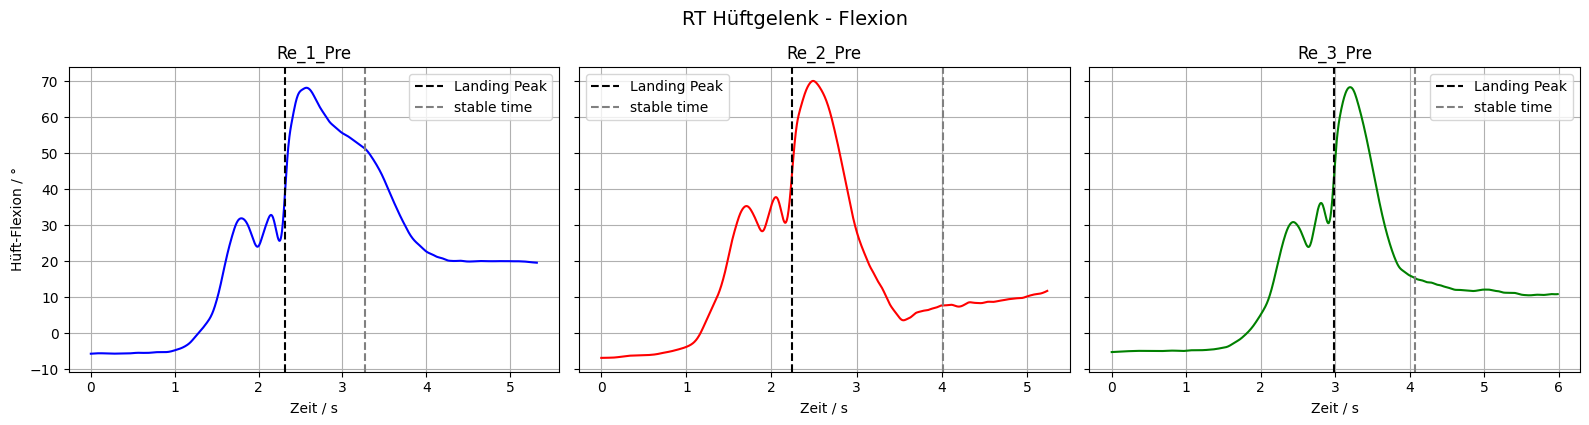

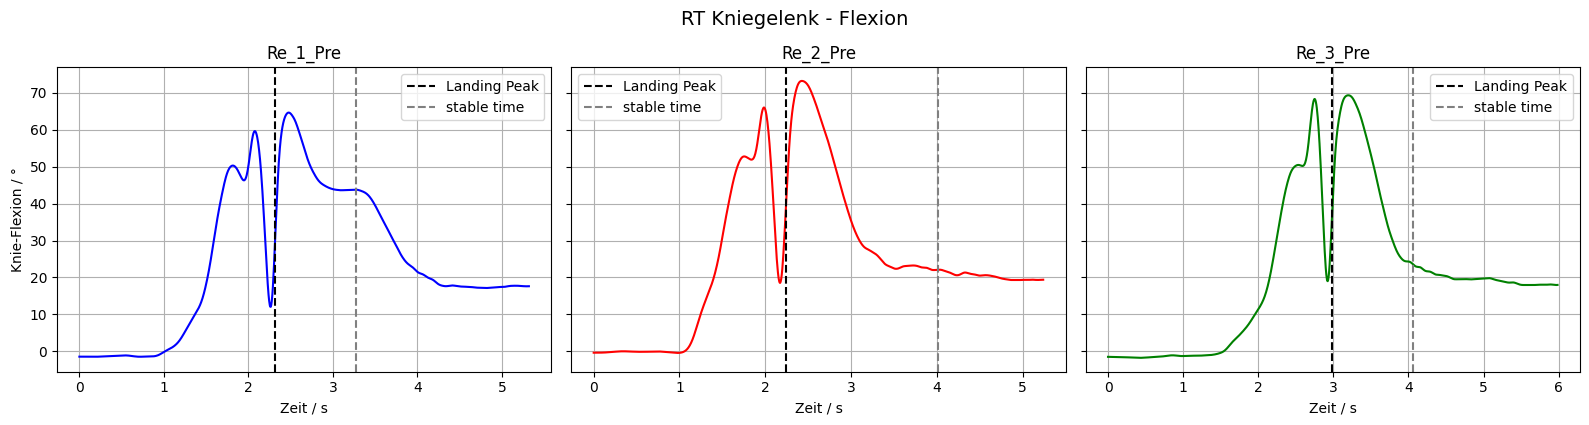

In [43]:
### Hüfte Flexion
# Erstelle Subplots (1 Zeile, 3 Spalten)
fig1, axes1 = plt.subplots(1, 3, figsize=(16, 4), sharey=True)

for i, (key, color) in enumerate(zip(keys_plotting, colors)):
    df = data[key]["df"]
    time = df["time"]
    df_angle = df[direktion + " Hip Flexion (deg)"]
    peak_time = data[key]["landing_peak_time"]
    stable_time = data[key]["stable_time"]

    ax = axes1[i]
    ax.plot(time, df_angle, color=color)
    ax.axvline(x=peak_time, color=color_peak, linestyle='--', label='Landing Peak')
    ax.axvline(x=stable_time, color=color_stable, linestyle='--', label='stable time')
    ax.set_title(key)
    ax.set_xlabel("Zeit / s")
    if i == 0:
        ax.set_ylabel("Hüft-Flexion / °")
    ax.grid(True)
    ax.legend()

# Abstand optimieren
plt.tight_layout()
plt.suptitle(direktion + " Hüftgelenk - Flexion", fontsize=14, y=1.05)
plt.savefig(folder_pictures + "hüftgelenk_flexion.png", dpi=300)
plt.show()


### Kniegelenk Flexion
# Erstelle Subplots (1 Zeile, 3 Spalten)
fig1, axes1 = plt.subplots(1, 3, figsize=(16, 4), sharey=True)

for i, (key, color) in enumerate(zip(keys_plotting, colors)):
    df = data[key]["df"]
    time = df["time"]
    df_angle = df[direktion + " Knee Flexion (deg)"]
    peak_time = data[key]["landing_peak_time"]
    stable_time = data[key]["stable_time"]

    ax = axes1[i]
    ax.plot(time, df_angle, color=color)
    ax.axvline(x=peak_time, color=color_peak, linestyle='--', label='Landing Peak')
    ax.axvline(x=stable_time, color=color_stable, linestyle='--', label='stable time')
    ax.set_title(key)
    ax.set_xlabel("Zeit / s")
    if i == 0:
        ax.set_ylabel("Knie-Flexion / °")
    ax.grid(True)
    ax.legend()

# Abstand optimieren
plt.tight_layout()
plt.suptitle(direktion + " Kniegelenk - Flexion", fontsize=14, y=1.05)
plt.savefig(folder_pictures + "kniegelenk_flexion.png", dpi=300)
plt.show()

### Kniegelenk Abduktion
# Erstelle Subplots (1 Zeile, 3 Spalten)
# fig2, axes2 = plt.subplots(1, 3, figsize=(16, 4), sharey=True)

# for i, (key, color) in enumerate(zip(keys_plotting, colors)):
#     df = data[key]["df"]
#     time = df["time"]
#     df_angle = df[direktion + " Knee Abduction (deg)"]
#     peak_time = data[key]["landing_peak_time"]
#     stable_time = data[key]["stable_time"]

#     ax = axes2[i]
#     ax.plot(time, df_angle, color=color)
#     ax.axvline(x=peak_time, color=color_peak, linestyle='--', label='Landing Peak')
#     ax.axvline(x=stable_time, color=color_stable, linestyle='--', label='stable time')
#     ax.set_title(key)
#     ax.set_xlabel("Zeit (s)")
#     if i == 0:
#         ax.set_ylabel("Knie-Abduction (°)")
#     ax.grid(True)
#     ax.legend()

# # Abstand optimieren
# plt.tight_layout()
# plt.suptitle(direktion + " Kniegelenk - Abduction", fontsize=14, y=1.05)
# plt.show()


# Ankle Auswerung

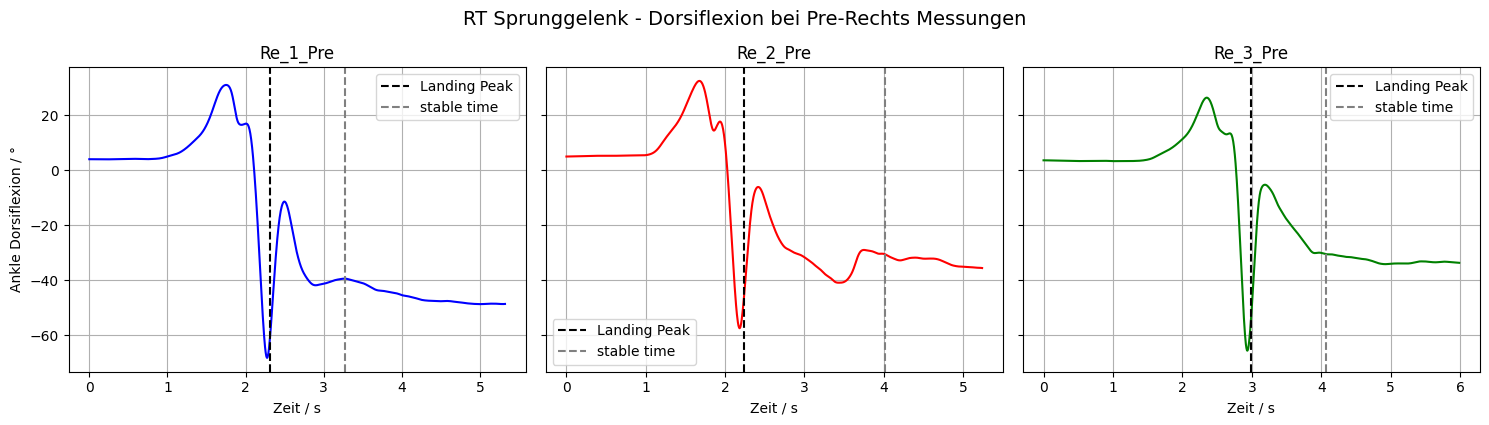

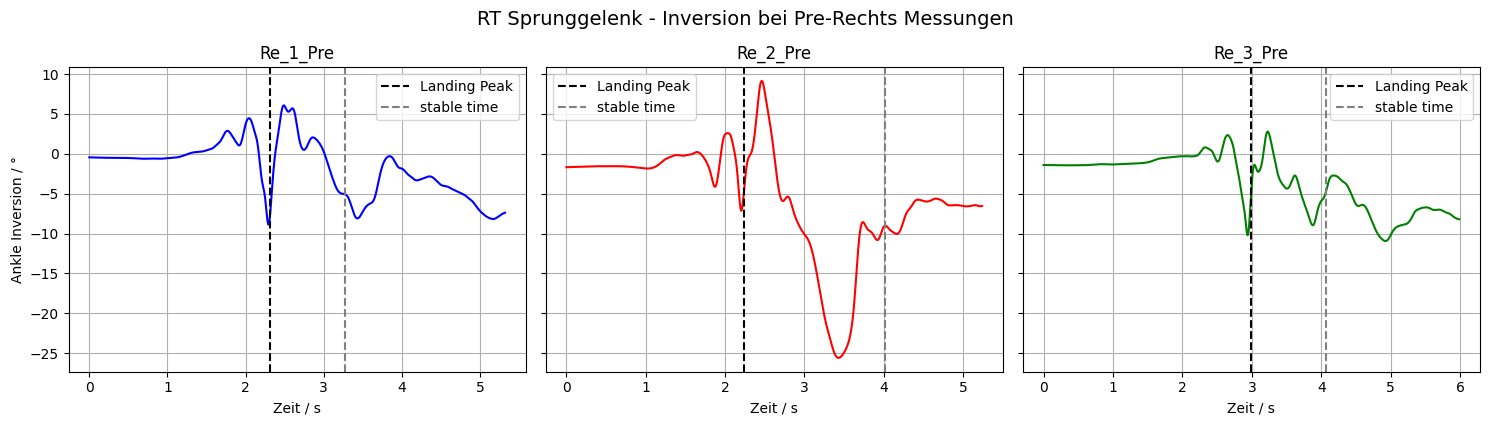

In [44]:
### Ankel Dorsiflexion
fig1, axes1 = plt.subplots(1, 3, figsize=(15, 4), sharey=True)

for i, (key, color) in enumerate(zip(keys_plotting, colors)):
    df = data[key]["df"]
    
    time = df["time"]
    df_angle = df[direktion + " Ankle Dorsiflexion (deg)"]
    peak_time = data[key]["landing_peak_time"]
    stable_time = data[key]["stable_time"]

    ax = axes1[i]
    ax.plot(time, df_angle, color=color)
    ax.axvline(x=peak_time, color=color_peak, linestyle='--', label='Landing Peak')
    ax.axvline(x=stable_time, color=color_stable, linestyle='--', label='stable time')
    ax.set_title(key)
    ax.set_xlabel("Zeit / s")
    if i == 0:
        ax.set_ylabel("Ankle Dorsiflexion / °")
    ax.grid(True)
    ax.legend()

# Abstand optimieren
plt.tight_layout()
plt.suptitle(direktion + " Sprunggelenk - Dorsiflexion bei Pre-Rechts Messungen", fontsize=14, y=1.05)
plt.savefig(folder_pictures + "sprunggelenk_dorsiflexion.png", dpi=300)
plt.show()


### Ankle Inversion
fig1, axes1 = plt.subplots(1, 3, figsize=(15, 4), sharey=True)

for i, (key, color) in enumerate(zip(keys_plotting, colors)):
    df = data[key]["df"]
    time = df["time"]
    df_angle = df[direktion + " Ankle Inversion (deg)"]
    peak_time = data[key]["landing_peak_time"]
    stable_time = data[key]["stable_time"]

    ax = axes1[i]
    ax.plot(time, df_angle, color=color)
    ax.axvline(x=peak_time, color=color_peak, linestyle='--', label='Landing Peak')
    ax.axvline(x=stable_time, color=color_stable, linestyle='--', label='stable time')
    ax.set_title(key)
    ax.set_xlabel("Zeit / s")
    if i == 0:
        ax.set_ylabel("Ankle Inversion / °")
    ax.grid(True)
    ax.legend()

# Abstand optimieren
plt.tight_layout()
plt.suptitle(direktion + " Sprunggelenk - Inversion bei Pre-Rechts Messungen", fontsize=14, y=1.05)
plt.savefig(folder_pictures + "sprunggelenk_inversion.png", dpi=300)
plt.show()


### Ankle Abduction
# fig1, axes1 = plt.subplots(1, 3, figsize=(15, 4), sharey=True)

# for i, (key, color) in enumerate(zip(keys_plotting, colors)):
#     df = data[key]["df"]
#     time = df["time"]
#     df_angle = df[direktion + " Ankle Abduction (deg)"]
#     peak_time = data[key]["landing_peak_time"]
#     stable_time = data[key]["stable_time"]

#     ax = axes1[i]
#     ax.plot(time, df_angle, color=color)
#     ax.axvline(x=peak_time, color=color_peak, linestyle='--', label='Landing Peak')
#     ax.axvline(x=stable_time, color=color_stable, linestyle='--', label='stable time')
#     ax.set_title(key)
#     ax.set_xlabel("Zeit (s)")
#     if i == 0:
#         ax.set_ylabel("Ankle Abduction (°)")
#     ax.grid(True)
#     ax.legend()

# # Abstand optimieren
# plt.tight_layout()
# plt.suptitle(direktion + " Sprunggelenk - Abduction bei Pre-Rechts Messungen", fontsize=14, y=1.05)
# plt.savefig(folder_pictures + "sprunggelenk_Abducktion.png", dpi=300)
# plt.show()



## Variabilität des Sprunggelenks nach Stable Time --> für Inversion

In [45]:
# print (data["Re_1_Pre"]["df"][direktion + " Ankle Inversion (deg)"])

# joints = ["RT Ankle Dorsiflexion (deg)", "LT Ankle Dorsiflexion (deg)"]
RT_joint = "RT Ankle Inversion (deg)"
LT_joint = "LT Ankle Inversion (deg)"

# Funktion anwenden und Standardabweichung berechnen
std_value_Ankle_Inversion = IMU_funcions.calculate_std_post_stable(data, keys, RT_joint, LT_joint, window_seconds=3)

# Zugriff auf gespeicherte Werte
# print(data["Re_3_Pre"]["std von Ankle Inversion (deg)"])

### Printen der STD und speichern in der Datenstruktur
last_phase = None  # Merken, ob vorher "Pre" oder "Post" war

for key in keys:
    # Teile Key auf → z. B. "Re_1_Pre" → ["Re", "1", "Pre"]
    parts = key.split("_")
    phase = parts[2]  # "Pre" oder "Post"

    # Trennlinie bei Wechsel von Pre → Post
    if last_phase is not None and phase != last_phase:
        print("--------------------------------------------------------------")

    std_value = data[key]["std von Ankle Inversion (deg)"]
    print(f"Standardabweichung für Ankle Dorsiflexion von {key}: {std_value:.3f}")

    last_phase = phase



Standardabweichung für Ankle Dorsiflexion von Li_1_Pre: 1.368
Standardabweichung für Ankle Dorsiflexion von Li_2_Pre: 0.995
Standardabweichung für Ankle Dorsiflexion von Li_3_Pre: 1.745
Standardabweichung für Ankle Dorsiflexion von Re_1_Pre: 2.299
Standardabweichung für Ankle Dorsiflexion von Re_2_Pre: 1.361
Standardabweichung für Ankle Dorsiflexion von Re_3_Pre: 2.202
--------------------------------------------------------------
Standardabweichung für Ankle Dorsiflexion von Li_1_Post: 1.621
Standardabweichung für Ankle Dorsiflexion von Li_2_Post: 1.296
Standardabweichung für Ankle Dorsiflexion von Li_3_Post: 5.459
Standardabweichung für Ankle Dorsiflexion von Re_1_Post: 0.589
Standardabweichung für Ankle Dorsiflexion von Re_2_Post: 0.477
Standardabweichung für Ankle Dorsiflexion von Re_3_Post: 1.772


## Vergleiche

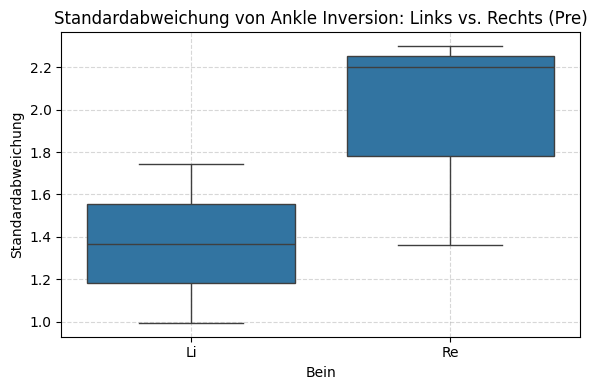

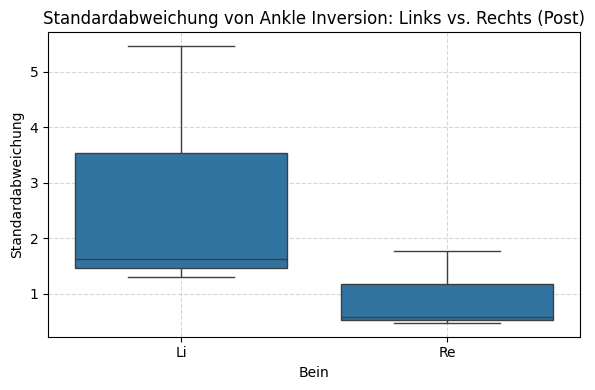

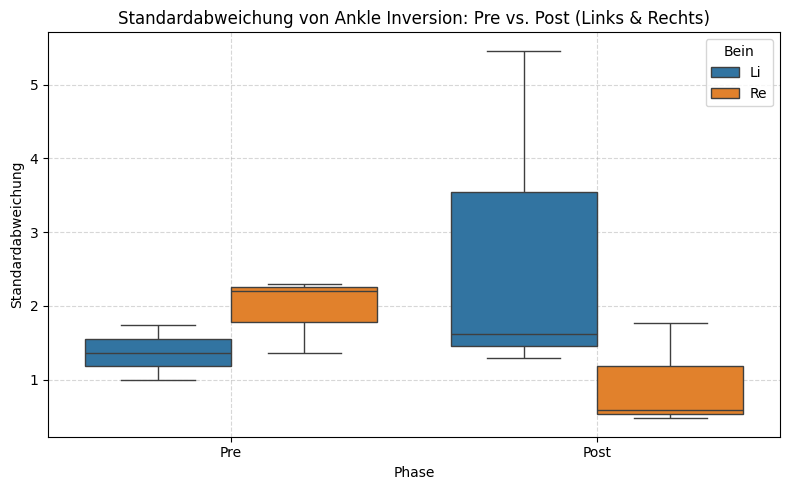

In [46]:
### plotten
IMU_funcions.plot_boxplot (
    DATA=data,
    title="Standardabweichung von Ankle Inversion: ",
    y_label="Standardabweichung",
    data_key="std von Ankle Inversion (deg)",
    folder_pictures_ = folder_pictures
)

# print(data["Re_1_Pre"]["std von Ankle Inversion (deg)"])

# Ergebnisse für Tabelle

In [47]:
### Daten in CSV speichern
# Erstelle DataFrame aus den Daten
# data_df = pd.DataFrame.from_dict(data, orient='index')
# Speichere DataFrame in CSV-Datei
# data_df.to_csv("C_Daten_Schröter_Till/C_Daten_Schröter_Till.csv", sep=';', decimal=',', encoding='utf-8')

In [48]:
### Durchschnitt für Zeit zwischen landing peak und stable time berechnen für Pre links und rechts für Post links und rechts
re_pre_mean_time_difference, re_post_mean_time_difference, li_pre_mean_time_difference, li_post_mean_time_difference = IMU_funcions.calculate_mean_stable_time(data, keys, "time_difference")
# Ausgabe der Ergebnisse
print(f"Durchschnittliche stabile Zeit für Re Pre: {re_pre_mean_time_difference:.2f} s")
print(f"Durchschnittliche stabile Zeit für Re Post: {re_post_mean_time_difference:.2f} s")
print(f"Durchschnittliche stabile Zeit für Li Pre: {li_pre_mean_time_difference:.2f} s")
print(f"Durchschnittliche stabile Zeit für Li Post: {li_post_mean_time_difference:.2f} s")

print("--------------------------------------------------------------")

# Plotten der Standardabweichung der Inversion des Sprunggelenks
re_pre_mean_std_inversion, re_post_mean_std_inversion, li_pre_mean_std_inversion, li_post_mean_std_inversion = IMU_funcions.calculate_mean_stable_time(data, keys, "std von Ankle Inversion (deg)")
# Ausgabe der Ergebnisse
print(f"Durchschnittliche Standardabweichung für Re Pre: {re_pre_mean_std_inversion:.2f}")
print(f"Durchschnittliche Standardabweichung für Re Post: {re_post_mean_std_inversion:.2f}")
print(f"Durchschnittliche Standardabweichung für Li Pre: {li_pre_mean_std_inversion:.2f}")
print(f"Durchschnittliche Standardabweichung für Li Post: {li_post_mean_std_inversion:.2f}")


Durchschnittliche stabile Zeit für Re Pre: 1.27 s
Durchschnittliche stabile Zeit für Re Post: 1.50 s
Durchschnittliche stabile Zeit für Li Pre: 1.17 s
Durchschnittliche stabile Zeit für Li Post: 1.07 s
--------------------------------------------------------------
Durchschnittliche Standardabweichung für Re Pre: 1.95
Durchschnittliche Standardabweichung für Re Post: 0.95
Durchschnittliche Standardabweichung für Li Pre: 1.37
Durchschnittliche Standardabweichung für Li Post: 2.79


In [36]:
# Aufruf der Funktion zum Speichern der Mittelwerte in die CSV-Datei
IMU_funcions.write_time_differences_to_csv("Time_Difference.csv", re_pre_mean_time_difference, re_post_mean_time_difference, li_pre_mean_time_difference, li_post_mean_time_difference, "D")

✅ Werte wurden in 'Time_Difference.csv' gespeichert.
